In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
import pickle as pkl

In [4]:
from datetime import timedelta

In [5]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.metrics import roc_curve, auc

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn import pipeline, preprocessing

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.metrics import precision_recall_curve

In [15]:
from sklearn.metrics import average_precision_score

In [16]:
from sklearn.metrics import recall_score

In [17]:
df=pd.read_csv('./data/start-up_mod.csv',index_col=0 )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9005 entries, 1 to 13142
Data columns (total 41 columns):
company_name                9005 non-null object
status                      9005 non-null object
country_code                9005 non-null object
state_code                  9005 non-null object
days_in_op                  9005 non-null float64
first_funding_dayinop       9005 non-null float64
sa_funded_daysop            9005 non-null float64
cr_funded_daysop            9005 non-null float64
ag_funded_daysop            9005 non-null float64
ve_funded_daysop            9005 non-null float64
CA                          9005 non-null int64
NY                          9005 non-null int64
MA                          9005 non-null int64
TX                          9005 non-null int64
WA                          9005 non-null int64
founded_month               9005 non-null int64
ave_inf_y                   9005 non-null float64
sa_raised_amount_usd_adj    9005 non-null float64
ag_raise

In [19]:
df[:10]

,company_name,status,country_code,state_code,days_in_op,first_funding_dayinop,sa_funded_daysop,cr_funded_daysop,ag_funded_daysop,ve_funded_daysop,...,social,semiconductor,medical,consulting,education,search,messaging,news,transportation,fashion
1,1-800-DENTIST,operating,USA,CA,10929.0,8996.0,0.0,0.0,0.0,8996.0,...,0,0,0,0,0,0,0,0,0,0
2,1-800-DOCTORS,operating,USA,NJ,11660.0,9922.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10-20 Media,operating,USA,MD,5450.0,3090.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1010data,acquired,USA,NY,5816.0,3719.0,0.0,0.0,0.0,3719.0,...,0,0,0,0,0,0,0,0,0,0
6,16 Mile Solutions,operating,USA,WA,3624.0,1257.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,170 Systems,acquired,USA,MA,9468.0,4488.0,4488.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,1Cast,closed,USA,WA,3473.0,803.0,0.0,0.0,0.0,803.0,...,0,0,0,0,0,0,0,1,0,0
13,1Life Healthcare,operating,USA,CA,5085.0,4097.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14,1stdibs,operating,USA,NY,5450.0,3958.0,0.0,0.0,4291.0,3958.0,...,0,0,0,0,0,0,0,0,0,0
16,20/20 Gene Systems Inc.,operating,USA,MD,5695.0,4530.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.describe()

,days_in_op,first_funding_dayinop,sa_funded_daysop,cr_funded_daysop,ag_funded_daysop,ve_funded_daysop,CA,NY,MA,TX,...,social,semiconductor,medical,consulting,education,search,messaging,news,transportation,fashion
count,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,...,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000,9005.000000
mean,6547.584342,3821.893948,378.483953,2.272404,172.455858,963.587674,0.338257,0.069517,0.085508,0.056968,...,0.026874,0.029428,0.025541,0.020766,0.022543,0.016991,0.010439,0.010217,0.007440,0.006108
std,5890.911175,6264.862617,1663.660942,142.543025,1196.385994,2390.084116,0.473143,0.254345,0.279652,0.231795,...,0.161724,0.169013,0.157771,0.142609,0.148450,0.129243,0.101641,0.100565,0.085941,0.077917
min,3286.000000,-3715.000000,-1208.000000,0.000000,-731.000000,-15341.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3989.000000,1064.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5207.000000,2351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6546.000000,4259.000000,0.000000,0.000000,0.000000,1104.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,91282.000000,91028.000000,61421.000000,10844.000000,61269.000000,62457.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.columns

Index(['company_name', 'status', 'country_code', 'state_code', 'days_in_op',
       'first_funding_dayinop', 'sa_funded_daysop', 'cr_funded_daysop',
       'ag_funded_daysop', 've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA',
       'founded_month', 'ave_inf_y', 'sa_raised_amount_usd_adj',
       'ag_raised_amount_usd_adj', 've_raised_amount_usd_adj',
       'cr_raised_amount_usd_adj', 'software', 'Biotech', 'health', 'web',
       'mobile', 'enterprise', 'hardware', 'advertising', 'security',
       'manufacturing', 'social', 'semiconductor', 'medical', 'consulting',
       'education', 'search', 'messaging', 'news', 'transportation',
       'fashion'],
      dtype='object')

In [22]:
y1,X1=dmatrices('''status ~ CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + ag_funded_daysop + ag_raised_amount_usd_adj
                + software + Biotech + health + web + mobile + enterprise + hardware
                + advertising + security + manufacturing + social + semiconductor
                + medical + consulting + education + search + messaging + news
                + transportation+ fashion''',data=df[df['country_code']=='USA'],return_type='dataframe')

In [23]:
X1=X1.drop(columns='Intercept')


In [24]:
X1[:10]

,CA,NY,MA,TX,WA,founded_month,first_funding_dayinop,ave_inf_y,ag_funded_daysop,ag_raised_amount_usd_adj,...,social,semiconductor,medical,consulting,education,search,messaging,news,transportation,fashion
1,1.0,0.0,0.0,0.0,0.0,1.0,8996.0,10.070707,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,9922.0,9.494949,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,3090.0,16.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,3719.0,16.393939,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,1.0,1257.0,19.363636,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,4488.0,12.202020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,1.0,6.0,803.0,19.363636,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,1.0,0.0,0.0,0.0,0.0,1.0,4097.0,17.169697,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,1.0,0.0,0.0,0.0,1.0,3958.0,16.888889,4291.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,5.0,4530.0,16.393939,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9005 entries, 1 to 13142
Data columns (total 30 columns):
CA                          9005 non-null float64
NY                          9005 non-null float64
MA                          9005 non-null float64
TX                          9005 non-null float64
WA                          9005 non-null float64
founded_month               9005 non-null float64
first_funding_dayinop       9005 non-null float64
ave_inf_y                   9005 non-null float64
ag_funded_daysop            9005 non-null float64
ag_raised_amount_usd_adj    9005 non-null float64
software                    9005 non-null float64
Biotech                     9005 non-null float64
health                      9005 non-null float64
web                         9005 non-null float64
mobile                      9005 non-null float64
enterprise                  9005 non-null float64
hardware                    9005 non-null float64
advertising                 9005 non-null 

In [26]:
y1['status[ipo]'].sum()

684.0

In [27]:
y1['status[acquired]'].sum()/len(y1)

0.21576901721265965

In [28]:
y1_ac=y1['status[acquired]']

In [29]:
##logistc regression and auc estimates

X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ac = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
    
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)

y_score1=log_ac.predict_proba(X1_train)[:,1]

fpr1_ac_train, tpr1_ac_train,_ = roc_curve(y1_ac_train, y_score1)
roc_auc1_ac_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac,roc_auc1_ac_train)

0.7349473221470509 0.7597469642459919


In [30]:
y1['status[ipo]'].sum()/len(y1)

0.07595780122154358

In [38]:
y1_ipo=y1['status[ipo]']

In [36]:
df[df['status']=='acquired'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 4 to 13134
Data columns (total 41 columns):
company_name                1943 non-null object
status                      1943 non-null object
country_code                1943 non-null object
state_code                  1943 non-null object
days_in_op                  1943 non-null float64
first_funding_dayinop       1943 non-null float64
sa_funded_daysop            1943 non-null float64
cr_funded_daysop            1943 non-null float64
ag_funded_daysop            1943 non-null float64
ve_funded_daysop            1943 non-null float64
CA                          1943 non-null int64
NY                          1943 non-null int64
MA                          1943 non-null int64
TX                          1943 non-null int64
WA                          1943 non-null int64
founded_month               1943 non-null int64
ave_inf_y                   1943 non-null float64
sa_raised_amount_usd_adj    1943 non-null float64
ag_raise

In [34]:
df[df['status']=='ipo']

,company_name,status,country_code,state_code,days_in_op,first_funding_dayinop,sa_funded_daysop,cr_funded_daysop,ag_funded_daysop,ve_funded_daysop,...,social,semiconductor,medical,consulting,education,search,messaging,news,transportation,fashion
19,22nd Century Group,ipo,USA,NY,6546.0,4744.0,5433.0,0.0,5515.0,0.0,...,0,0,0,0,0,0,0,0,0,0
43,3D Systems,ipo,USA,SC,10929.0,10241.0,9654.0,0.0,0.0,8778.0,...,0,0,0,0,0,0,0,0,0,0
92,8x8 Inc,ipo,USA,CA,10564.0,9820.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
107,A10 Networks,ipo,USA,CA,4081.0,92.0,92.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
108,A123 Systems,ipo,USA,MA,5450.0,1765.0,1765.0,0.0,0.0,4175.0,...,0,0,0,0,0,0,0,0,0,0
114,Aastrom Biosciences,ipo,USA,MI,9833.0,8468.0,0.0,0.0,0.0,8468.0,...,0,0,0,0,0,0,0,0,0,0
125,Abbott Labs,ipo,USA,IL,9103.0,6649.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
145,Abtech Holdings,ipo,USA,AZ,7642.0,7442.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
148,A.C. Moore,ipo,USA,NJ,11660.0,9287.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
150,Acacia Research,ipo,USA,CA,8372.0,2516.0,6990.0,0.0,0.0,4423.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
## logistic regression or ipo category
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)


tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ipo = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

y_score=log_ipo.predict_proba(X1_train)[:,1]

fpr1_ipo_train, tpr1_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_train = auc(fpr1_ipo_train, tpr1_ipo_train)

print(roc_auc1_ipo,roc_auc1_ipo_train)

0.7587420578689947 0.7248604745564373


In [40]:
## logistic regression with normallized variables and calculating AUC

# log_ac_p=pipeline.Pipeline([
#     ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
#     ( 'log', LogisticRegression())
# ])

norm=preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)

X1_train_n=norm.fit_transform(X1_train)

X1_test_n = norm.transform(X1_test)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }


log_ac_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ac_n.fit(X1_train_n,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test_n)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac, tpr1_ac)

y_score=log_ac_n.predict_proba(X1_train_n)[:,1]

fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc1_ac_n_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac, roc_auc1_ac_n_train )

0.7349473221470509 0.7597469642459919


In [41]:
## logistic regression with normallized variables and calculating AUC

log_ipo_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo_n.fit(X1_train_n,y1_ipo_train)
y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)

y_score=log_ipo_n.predict_proba(X1_train_n)[:,1]

fpr1_ipo_n_train, tpr1_ipo_n_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_n_train = auc(fpr1_ipo_n_train, tpr1_ipo_n_train)

print(roc_auc1_ipo_n, roc_auc1_ipo_n_train)

0.7713031951364449 0.730083553493567


In [42]:
# random forest model for AC
tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}

randomforest_ac =  GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ac.fit(X1_train,y1_ac_train)
y_score=randomforest_ac.predict_proba(X1_test)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


y_score=randomforest_ac.predict_proba(X1_train)[:,1]

fpr2_ac_train, tpr2_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc2_ac_train = auc(fpr2_ac_train, tpr2_ac_train)


In [43]:
print(roc_auc2_ac, roc_auc2_ac_train)

0.7229197091169195 0.7603684879605053


In [44]:
# random forest model for IPO

tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}
randomforest_ipo = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ipo.fit(X1_train,y1_ipo_train)

y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    

roc_auc2_ipo, roc_auc2_ipo_train 

(0.7617977784888239, 0.7825665177543357)

In [45]:
# Gradient Boosting Classifier on ipo
learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ipo=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ipo.fit(X1_train,y1_ipo_train)

y_score=GBC_ipo.predict_proba(X1_test)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

y_score_train=GBC_ipo.predict_proba(X1_train)[:,1]
fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)

 

In [46]:
roc_auc3_ipo, roc_auc3_ipo_train 

(0.7572999040087762, 0.8115020569586268)

In [47]:
# Gradient Boosting Classifier on AC

learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ac=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ac.fit(X1_train,y1_ac_train)

y_score=GBC_ac.predict_proba(X1_test)[:,1]
fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

y_score_train=GBC_ac.predict_proba(X1_train)[:,1]
fpr3_ac_train, tpr3_ac_train,_ = roc_curve(y1_ac_train, y_score_train)
roc_auc3_ac_train = auc(fpr3_ac_train, tpr3_ac_train)

roc_auc3_ac, roc_auc3_ac_train 

(0.7332624877060174, 0.8191335976408942)

In [48]:
#Support vector machine on IPO

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]


SVC1_ipo=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ipo.fit(X1_train_n,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test_n)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)

y_score=SVC1_ipo.predict_proba(X1_train_n)[:,1]
fpr4_ipo_train, tpr4_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc4_ipo_train = auc(fpr4_ipo_train, tpr4_ipo_train)

roc_auc4_ipo, roc_auc4_ipo_train

(0.6252182657585591, 0.7607504670333329)

In [49]:
#Support vector machine on ac

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]

SVC1_ac=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ac.fit(X1_train_n,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test_n)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

y_score=SVC1_ac.predict_proba(X1_train_n)[:,1]
fpr4_ac_train, tpr4_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc4_ac_train = auc(fpr4_ac_train, tpr4_ac_train)

roc_auc4_ac, roc_auc4_ac_train

(0.6481760200280153, 0.7032715535929563)

In [50]:
#Naive-Bayes on IPO, it does not have hyperparameters 
bayes_ipo = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ipo.fit(X1_train,y1_ipo_train)

y_score=bayes_ipo.predict_proba(X1_test)[:,1]
fpr6_ipo, tpr6_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc6_ipo = auc(fpr6_ipo, tpr6_ipo)

y_score=bayes_ipo.predict_proba(X1_train)[:,1]
fpr6_ipo_train, tpr6_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc6_ipo_train = auc(fpr6_ipo_train, tpr6_ipo_train)

roc_auc6_ipo, roc_auc6_ipo_train

(0.669136536088129, 0.6580198547962033)

In [51]:
#Naive-Bayes on ac, it does not have hyperparameters 
bayes_ac = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ac.fit(X1_train,y1_ac_train)

y_score=bayes_ac.predict_proba(X1_test)[:,1]
fpr6_ac, tpr6_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc6_ac = auc(fpr6_ac, tpr6_ac)

y_score=bayes_ac.predict_proba(X1_train)[:,1]
fpr6_ac_train, tpr6_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc6_ac_train = auc(fpr6_ac_train, tpr6_ac_train)

In [52]:
def cv_Bayes(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    
    bayes = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
   
    bayes.fit(X1_train,y1_ipo_train)

    y_score=bayes.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=bayes.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)

    
    return roc_auc2_ipo,roc_auc2_ipo_train,bayes,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [53]:
def Bayes_afew_times(X1, y1_ipo, n=10):
    info= (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    
#         (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
#                          columns=['Test auc','Train auc'])).mean()
                         
                         
    return info

In [54]:
info_b_ipo=Bayes_afew_times(X1, y1_ipo,n=10)

In [55]:
np.mean(info_b_ipo['Train auc'])

0.6586491057881811

In [56]:
np.mean(info_b_ipo['Test auc'])

0.6638162978202502

In [57]:
info_b_ac=Bayes_afew_times(X1, y1_ac,n=10)

In [58]:
info_b_ac

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.602361,0.603728,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,3667 0.0 7029 0.0 4035 0.0 1549 ...,346 0.0 1587 0.0 2299 1.0 8291 ...
1,0.608105,0.619500,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,6895 0.0 8109 0.0 9682 0.0 5419 ...,5305 0.0 9627 0.0 2547 0.0 10176 ...
2,0.621226,0.614557,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,1697 0.0 8865 0.0 10779 0.0 11852 ...,5071 1.0 2263 0.0 10285 1.0 4041 ...
3,0.583629,0.609460,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,6827 0.0 7366 0.0 12347 0.0 4689 ...,7747 0.0 1174 0.0 12503 0.0 9788 ...
4,0.601712,0.607770,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,10417 1.0 11704 1.0 1550 0.0 594 ...,5455 1.0 3244 0.0 1430 0.0 897 ...
5,0.589503,0.608209,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,5575 0.0 8942 0.0 9710 0.0 3390 ...,7842 1.0 1425 0.0 6813 0.0 54 ...
6,0.604536,0.618382,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,9543 0.0 6963 0.0 4428 0.0 12101 ...,4927 1.0 8519 0.0 2289 0.0 2355 ...
7,0.606117,0.626368,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,8679 0.0 12288 1.0 7065 0.0 7309 ...,514 0.0 7713 0.0 10264 1.0 11919 ...
8,0.602546,0.609734,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,3899 0.0 6336 0.0 12192 0.0 1554 ...,7903 0.0 10807 0.0 3105 0.0 8205 ...
9,0.622077,0.614483,GaussianNB(priors=None),CA NY MA TX WA founded_month ...,CA NY MA TX WA founded_month ...,1224 0.0 12712 0.0 11728 0.0 2730 ...,10494 0.0 3396 1.0 12399 0.0 8378 ...


In [59]:
np.mean(info_b_ac['Train auc'])

0.6132191288534466

In [60]:
np.mean(info_b_ac['Test auc'])

0.604181245698669

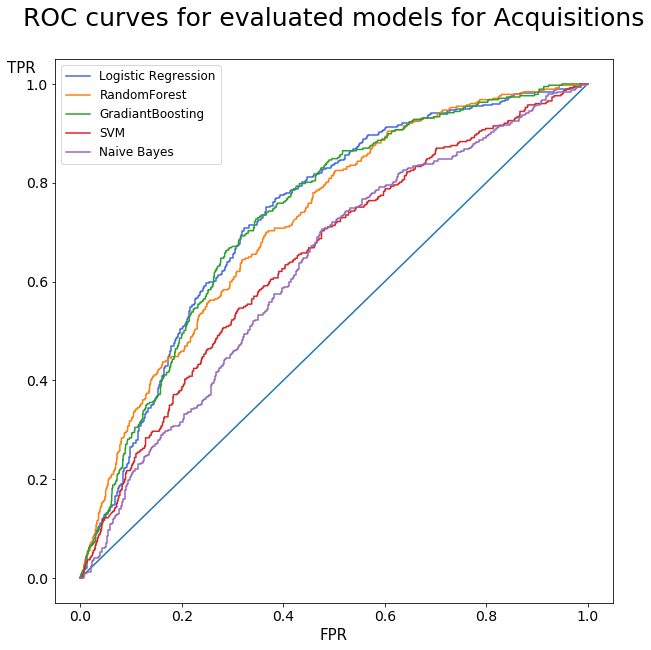

In [61]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='Logistic Regression', color='royalblue')
#plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr2_ac,tpr2_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM')
plt.plot(fpr6_ac,tpr6_ac,label='Naive Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


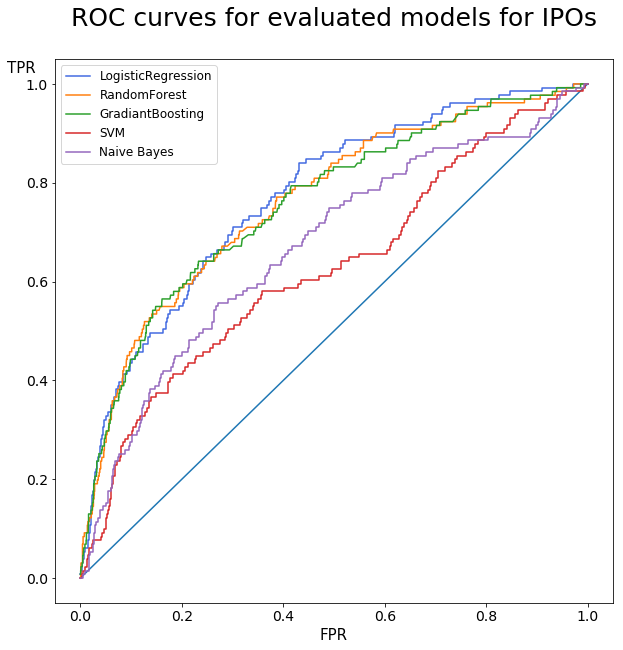

In [62]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='LogisticRegression', color='royalblue')
# plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr2_ipo,tpr2_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM')
plt.plot(fpr6_ipo,tpr6_ipo,label='Naive Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [63]:
Name=['logr', 'logr_n','RandomForest', 'GradiantBoosting','SVM','N Bayes']

In [64]:
Model_ac=[log_ac,log_ac_n,randomforest_ac,GBC_ac,SVC1_ac,bayes_ac]

In [65]:
Model_ipo=[log_ipo,log_ipo_n,randomforest_ipo,GBC_ipo,SVC1_ipo,bayes_ipo]

In [66]:
auc_test_ac=[roc_auc1_ac,roc_auc1_ac_n, roc_auc2_ac,roc_auc3_ac,roc_auc4_ac, roc_auc6_ac]

In [67]:
auc_train_ac=[roc_auc1_ac_train, roc_auc1_ac_n_train, roc_auc2_ac_train,roc_auc3_ac_train,roc_auc4_ac_train, roc_auc6_ac_train]

In [68]:
auc_test_ipo=[roc_auc1_ipo,roc_auc1_ipo_n, roc_auc2_ipo,roc_auc3_ipo,roc_auc4_ipo, roc_auc6_ipo]

In [69]:
auc_train_ipo=[roc_auc1_ipo_train,roc_auc1_ipo_n_train, roc_auc2_ipo_train,roc_auc3_ipo_train,roc_auc4_ipo_train, roc_auc6_ipo_train]

In [70]:
fpr_ipo =[fpr1_ipo,fpr1_ipo_n,fpr2_ipo,fpr3_ipo,fpr4_ipo,fpr6_ipo]

In [71]:
fpr_ac =[fpr1_ac,fpr1_ac_n,fpr2_ac,fpr3_ac,fpr4_ac,fpr6_ac]

In [72]:
tpr_ac =[tpr1_ac,tpr1_ac_n,tpr2_ac,tpr3_ac,tpr4_ac,tpr6_ac]

In [73]:
tpr_ipo =[tpr1_ipo,tpr1_ipo_n,tpr2_ipo,tpr3_ipo,tpr4_ipo,tpr6_ipo]

In [74]:
fpr_ipo_train =[fpr1_ipo_train,fpr1_ipo_n_train,fpr2_ipo_train,fpr3_ipo_train,fpr4_ipo_train,fpr6_ipo_train]

In [75]:
fpr_ac_train =[fpr1_ac_train,fpr1_ac_n_train,fpr2_ac_train,fpr3_ac_train,fpr4_ac_train,fpr6_ac_train]

In [76]:
tpr_ipo_train =[tpr1_ipo_train,tpr1_ipo_n_train,tpr2_ipo_train,tpr3_ipo_train,tpr4_ipo_train,tpr6_ipo_train]

In [77]:
tpr_ac_train =[tpr1_ac_train,tpr1_ac_n_train,tpr2_ac_train,tpr3_ac_train,tpr4_ac_train,tpr6_ac_train]

In [78]:
Model_data_ac=pd.DataFrame({'name':Name, 'model':Model_ac,'auc_test_ac':auc_test_ac,
                            'auc_train_ac':auc_train_ac })

In [79]:
Model_data_ipo=pd.DataFrame({'name':Name, 'model':Model_ipo,'auc_test_ipo':auc_test_ipo,
                            'auc_train_ipo':auc_train_ipo})

In [80]:
Model_data_ac

,name,model,auc_test_ac,auc_train_ac
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.734947,0.759747
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.734947,0.759747
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.722920,0.760368
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.733262,0.819134
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.648176,0.703272
5,N Bayes,GaussianNB(priors=None),0.626717,0.617488


In [81]:
Model_data_ipo

,name,model,auc_test_ipo,auc_train_ipo
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.758742,0.724860
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.771303,0.730084
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.761798,0.782567
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.757300,0.811502
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.625218,0.760750
5,N Bayes,GaussianNB(priors=None),0.669137,0.658020


In [82]:
Model_data_ac[['name','auc_test_ac','auc_train_ac']]

,name,auc_test_ac,auc_train_ac
0,logr,0.734947,0.759747
1,logr_n,0.734947,0.759747
2,RandomForest,0.722920,0.760368
3,GradiantBoosting,0.733262,0.819134
4,SVM,0.648176,0.703272
5,N Bayes,0.626717,0.617488


In [83]:
log_ac_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00616781, 0.00965365, 0.00822767, 0.01512774, 0.0258162 ,
        0.01972254, 0.02635797, 0.02233903, 0.02878626, 0.02630631,
        0.03562037, 0.02657262, 0.03780683, 0.02722859]),
 'std_fit_time': array([2.91213457e-04, 7.29060296e-05, 3.80727539e-04, 1.37529764e-03,
        7.08074360e-04, 2.10799450e-04, 1.95082695e-03, 4.33853181e-03,
        1.28706681e-03, 7.47610000e-03, 1.03452897e-02, 6.73251201e-03,
        1.26047610e-02, 7.84411579e-03]),
 'mean_score_time': array([0.00115108, 0.00138227, 0.00140429, 0.0014387 , 0.00152556,
        0.0014658 , 0.00149544, 0.00145459, 0.00152079, 0.00145443,
        0.00160837, 0.00152206, 0.00166925, 0.00154575]),
 'std_score_time': array([3.42764887e-05, 2.10802416e-05, 3.56529456e-05, 8.90048486e-05,
        4.69679894e-05, 3.58204906e-05, 9.30794465e-05, 1.50638285e-05,
        4.43707730e-05, 3.25347949e-05, 3.96224613e-05, 8.41400300e-05,
        1.76361253e-04, 3.78229032e-05]),
 'param_C': masked_array(d

In [84]:
GBC_ac.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.34157737, 0.38977043, 0.4301211 , 0.48562161, 0.35376143,
        0.3808403 , 0.43139466, 0.47920005, 0.34881655, 0.40636063,
        0.42633764, 0.47860368, 0.35556293, 0.39884702, 0.43606957,
        0.47258361, 0.34547035, 0.39996807, 0.43457476, 0.47367732,
        0.35634828, 0.38942568, 0.44590767, 0.46863468, 0.34302306,
        0.39658602, 0.45253595, 0.49694427, 0.34956272, 0.38775222,
        0.4459854 , 0.49036574, 0.34328246, 0.39813375, 0.43975552,
        0.51388725, 0.51341351, 0.68144727, 0.58124574, 0.61925292,
        0.3798635 , 0.48484087, 0.48777167, 0.52608943, 0.38315924,
        0.4071633 , 0.45976369, 0.50995366, 0.36171476, 0.41419458,
        0.46604522, 0.51684594, 0.36074996, 0.40445797, 0.45933199,
        0.49990034, 0.37038787, 0.40460086, 0.45508734, 0.51103497,
        0.37179526, 0.40706499, 0.45138669, 0.50555944, 0.36940495,
        0.40919201, 0.4808077 , 0.50960787, 0.36318469, 0.41348974,
        0.45133734, 0.50350006,

In [85]:
log_ipo_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00609612, 0.00977691, 0.00840274, 0.01298332, 0.02187228,
        0.0167493 , 0.02852933, 0.01983865, 0.02892335, 0.02218374,
        0.03405301, 0.02134824, 0.06012861, 0.02495702]),
 'std_fit_time': array([0.00023093, 0.00089648, 0.00015536, 0.00064968, 0.0010333 ,
        0.00141508, 0.00087585, 0.00291506, 0.00114292, 0.00755372,
        0.00861944, 0.00761432, 0.04682303, 0.01171389]),
 'mean_score_time': array([0.00113734, 0.00157905, 0.00142686, 0.00139197, 0.0013841 ,
        0.0014027 , 0.00156299, 0.001513  , 0.00172257, 0.00148416,
        0.00159868, 0.00142797, 0.00143234, 0.00138195]),
 'std_score_time': array([2.77470701e-05, 1.78698290e-04, 1.48207444e-04, 4.28633611e-05,
        4.35657720e-05, 7.93494220e-05, 2.85706865e-05, 6.90816204e-05,
        8.61400750e-05, 1.70480565e-04, 1.31779470e-04, 2.45036878e-05,
        2.67265230e-05, 2.81363107e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [86]:
recall_score_ac_n=[]
precision_score_ac_n=[]
f1_score_ac=[]
for i in np.linspace(0,1,100):
    y_score=log_ac_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ac_n.append(metrics.precision_score(y1_ac_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ac_n.append(metrics.recall_score(y1_ac_test, y_score))
    f1_score_ac.append(metrics.f1_score(y1_ac_test, y_score))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
ind=np.argmax(f1_score_ac)
list(np.linspace(0,1,100))[ind]

0.21212121212121213

In [88]:
f1_score_ac[ind]


0.4793536804308798

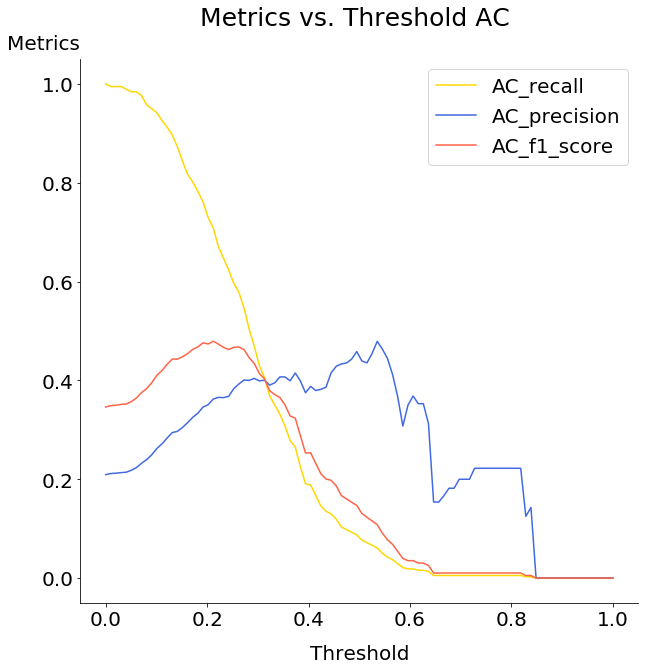

In [89]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ac_n
y2=precision_score_ac_n
y3=f1_score_ac

ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='AC_recall',color='gold')
plt.plot(x,y2,label='AC_precision',color='royalblue')
plt.plot(x,y3,label='AC_f1_score',color='tomato')
#plt.axvline(0.215, color='gold', linestyle='solid')
plt.title("Metrics vs. Threshold AC \n", size = 25)

plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Metrics \n ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 20});



In [90]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.15151515151515152
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[699, 725],
       [ 59, 318]])

In [91]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.92      0.49      0.64      1424
        1.0       0.30      0.84      0.45       377

avg / total       0.79      0.56      0.60      1801



In [92]:
ind=np.argmax(precision_score_ac_n)
list(np.linspace(0,1,100))[ind]

0.5353535353535354

In [93]:
precision_score_ac_n[ind]

0.4791666666666667

In [94]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.36363636363636365
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[1266,  158],
       [ 272,  105]])

In [95]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.82      0.89      0.85      1424
        1.0       0.40      0.28      0.33       377

avg / total       0.73      0.76      0.74      1801



In [96]:
recall_score_ipo_n=[]
precision_score_ipo_n=[]
f1_score_ipo=[]

for i in np.linspace(0,1,100):
    y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ipo_n.append(metrics.precision_score(y1_ipo_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ipo_n.append(metrics.recall_score(y1_ipo_test, y_score))
    f1_score_ipo.append(metrics.f1_score(y1_ipo_test, y_score))


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: P

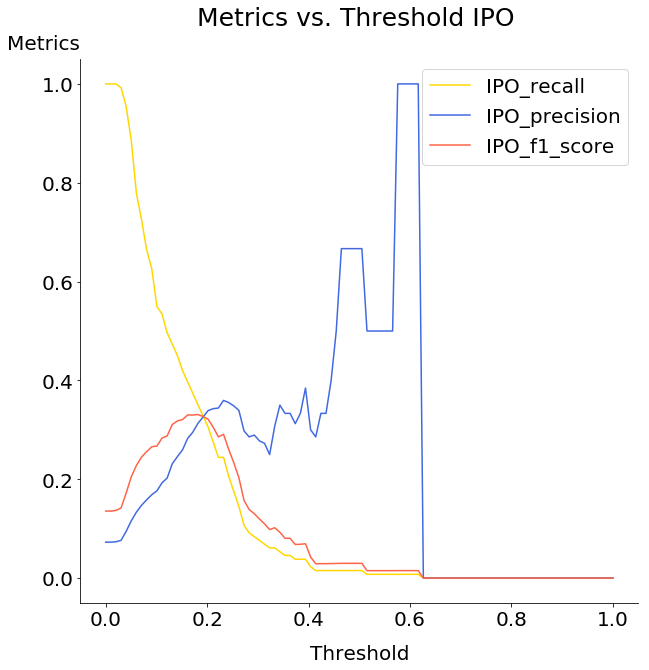

In [97]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ipo_n
y2=precision_score_ipo_n
y3=f1_score_ipo
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='IPO_recall',color='gold')
plt.plot(x,y2,label='IPO_precision',color='royalblue')
plt.plot(x,y3,label='IPO_f1_score',color='tomato')
plt.title("Metrics vs. Threshold IPO \n", size = 25)
plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Metrics \n', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 20});

In [98]:
ind=np.argmax(f1_score_ipo)
list(np.linspace(0,1,100))[ind]

0.18181818181818182

In [99]:
ind

18

In [100]:
f1_score_ipo[ind]

0.33093525179856115

In [101]:
y_ipo_predlogn=log_ipo_n.predict_proba(X1_test_n)[:,1] >0.09090909090909091
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[1266,  404],
       [  49,   82]])

In [102]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.96      0.76      0.85      1670
        1.0       0.17      0.63      0.27       131

avg / total       0.90      0.75      0.81      1801



In [103]:
ind=np.argmax(precision_score_ipo_n)
list(np.linspace(0,1,100))[ind]

0.5757575757575758

In [104]:
precision_score_ipo_n[ind]

1.0

In [105]:
y_ipo_predlogn=log_ipo_n.predict_proba(X1_test_n)[:,1] >0.09090909090909091
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[1266,  404],
       [  49,   82]])

In [106]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.96      0.76      0.85      1670
        1.0       0.17      0.63      0.27       131

avg / total       0.90      0.75      0.81      1801



In [107]:
log_ac_n.best_estimator_.coef_

array([[ 0.22513601,  0.05752613,  0.13046114,  0.06022868,  0.09899382,
        -0.04409238, -2.34196252, -1.27514175, -0.06971329, -0.05472406,
         0.16099984, -0.16875023, -0.05065673,  0.08897953,  0.07397237,
         0.05553203, -0.09417055,  0.09206601,  0.09215702, -0.13409399,
         0.06353109,  0.07495924,  0.0078866 , -0.06919904, -0.06184466,
        -0.01322282, -0.0157615 ,  0.04632376, -0.0957814 , -0.09111261]])

In [108]:
len(X1.columns)

30

In [109]:
names = X1.columns
coefs_ac = log_ac_n.best_estimator_.coef_[0]
coef_ac=pd.DataFrame({'names':names,'coefs_ac':coefs_ac })

In [110]:
coef_ac['abscoef']=abs(coef_ac['coefs_ac'])

coef_ac=coef_ac.sort_values(by='abscoef',ascending=False)
coef_ac

,names,coefs_ac,abscoef
6,first_funding_dayinop,-2.341963,2.341963
7,ave_inf_y,-1.275142,1.275142
0,CA,0.225136,0.225136
11,Biotech,-0.168750,0.168750
10,software,0.161000,0.161000
19,manufacturing,-0.134094,0.134094
2,MA,0.130461,0.130461
4,WA,0.098994,0.098994
28,transportation,-0.095781,0.095781
16,hardware,-0.094171,0.094171


In [111]:
coef2_ac=coef_ac.iloc[:18]
coef2_ac

,names,coefs_ac,abscoef
6,first_funding_dayinop,-2.341963,2.341963
7,ave_inf_y,-1.275142,1.275142
0,CA,0.225136,0.225136
11,Biotech,-0.168750,0.168750
10,software,0.161000,0.161000
19,manufacturing,-0.134094,0.134094
2,MA,0.130461,0.130461
4,WA,0.098994,0.098994
28,transportation,-0.095781,0.095781
16,hardware,-0.094171,0.094171


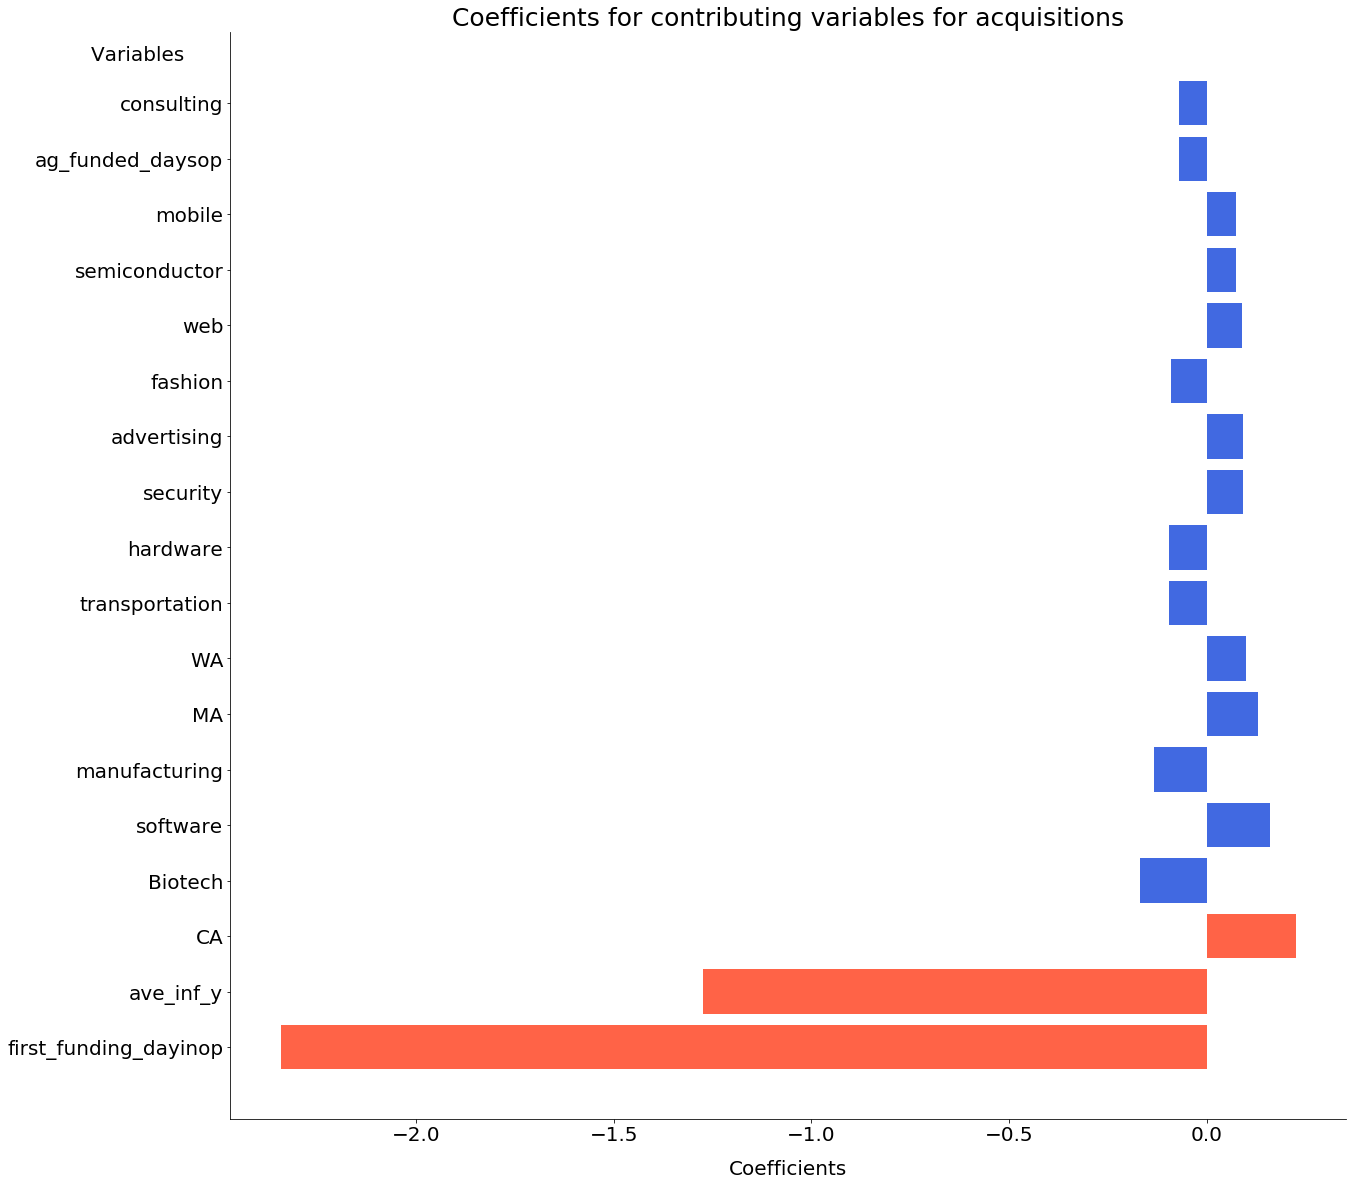

In [112]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef2_ac))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2_ac['coefs_ac'],color='royalblue')
plt.barh(crange[:3], coef2_ac['coefs_ac'][:3],color='tomato')
plt.yticks(crange, coef2_ac['names'])
ax = plt.gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables for acquisitions", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [113]:
names = X1.columns
coefs_ipo = log_ipo_n.best_estimator_.coef_[0]
coef_ipo=pd.DataFrame({'names':names,'coefs_ipo':coefs_ipo })

In [114]:
coef_ipo['abscoef']=abs(coef_ipo['coefs_ipo'])

coef_ipo=coef_ipo.sort_values(by='abscoef',ascending=False)
coef_ipo

,names,coefs_ipo,abscoef
7,ave_inf_y,-0.636119,0.636119
11,Biotech,0.388927,0.388927
12,health,0.212805,0.212805
6,first_funding_dayinop,-0.197320,0.197320
24,education,-0.132004,0.132004
2,MA,0.115718,0.115718
21,semiconductor,0.103776,0.103776
16,hardware,0.095054,0.095054
23,consulting,-0.053952,0.053952
1,NY,0.050264,0.050264


In [115]:
coef2_ipo=coef_ipo.iloc[:18]
coef2_ipo

,names,coefs_ipo,abscoef
7,ave_inf_y,-0.636119,0.636119
11,Biotech,0.388927,0.388927
12,health,0.212805,0.212805
6,first_funding_dayinop,-0.197320,0.197320
24,education,-0.132004,0.132004
2,MA,0.115718,0.115718
21,semiconductor,0.103776,0.103776
16,hardware,0.095054,0.095054
23,consulting,-0.053952,0.053952
1,NY,0.050264,0.050264


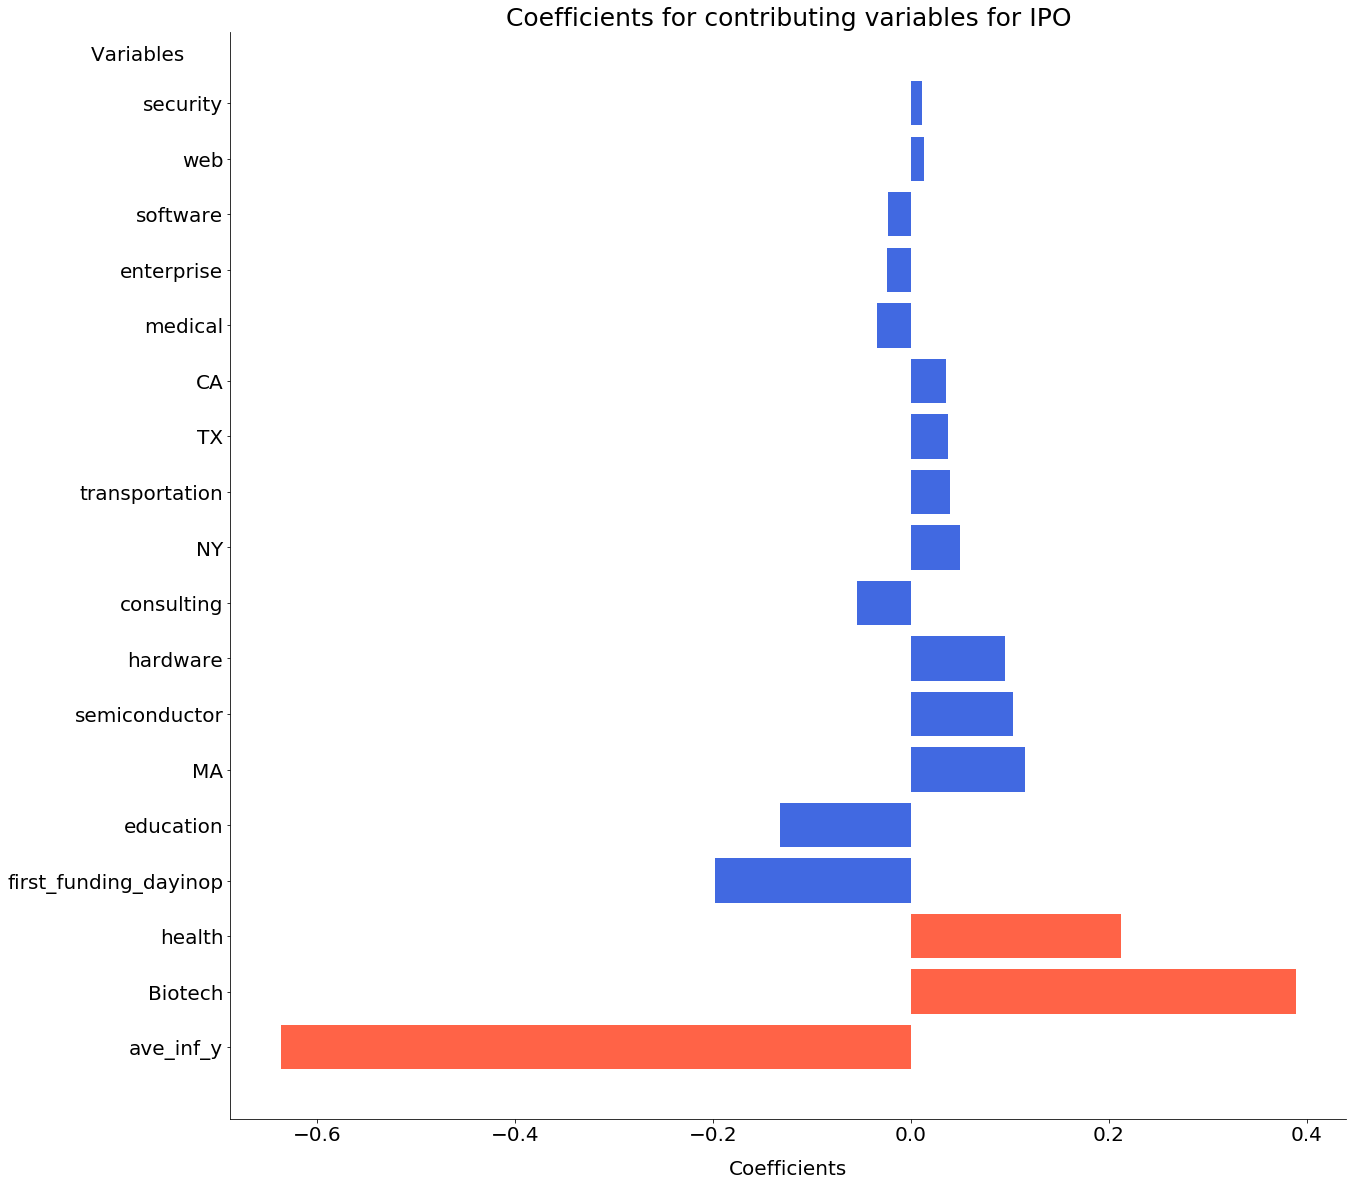

In [116]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef2_ipo))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2_ipo['coefs_ipo'],color='royalblue')
plt.barh(crange[:3], coef2_ipo['coefs_ipo'][:3],color='tomato')
plt.yticks(crange, coef2_ipo['names'])
ax = plt.gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables for IPO", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [117]:
pkl.dump(Model_data_ac, open("Model_data_ac_wo_sa_mod.pickle", "wb"))

In [118]:
pkl.dump(Model_data_ipo, open("Model_data_ipo_wo_sa_mod.pickle", "wb"))

In [119]:
Model_data_ac.to_csv('Model_data_ac_wo_sa_mod.csv')

In [120]:
Model_data_ipo.to_csv('Model_data_ipo_wo_sa_mod.csv')

In [121]:
log_ac_n.best_params_


{'C': 1000, 'penalty': 'l2'}

In [122]:
coef=pd.merge(coef_ipo,coef_ac,how='left', on='names')

In [123]:
coef=coef.sort_values(by='abscoef_y',ascending=False)

In [124]:
coef

,names,coefs_ipo,abscoef_x,coefs_ac,abscoef_y
3,first_funding_dayinop,-0.197320,0.197320,-2.341963,2.341963
0,ave_inf_y,-0.636119,0.636119,-1.275142,1.275142
12,CA,0.035421,0.035421,0.225136,0.225136
1,Biotech,0.388927,0.388927,-0.168750,0.168750
15,software,-0.022894,0.022894,0.161000,0.161000
24,manufacturing,0.000000,0.000000,-0.134094,0.134094
5,MA,0.115718,0.115718,0.130461,0.130461
20,WA,-0.007814,0.007814,0.098994,0.098994
10,transportation,0.039760,0.039760,-0.095781,0.095781
7,hardware,0.095054,0.095054,-0.094171,0.094171


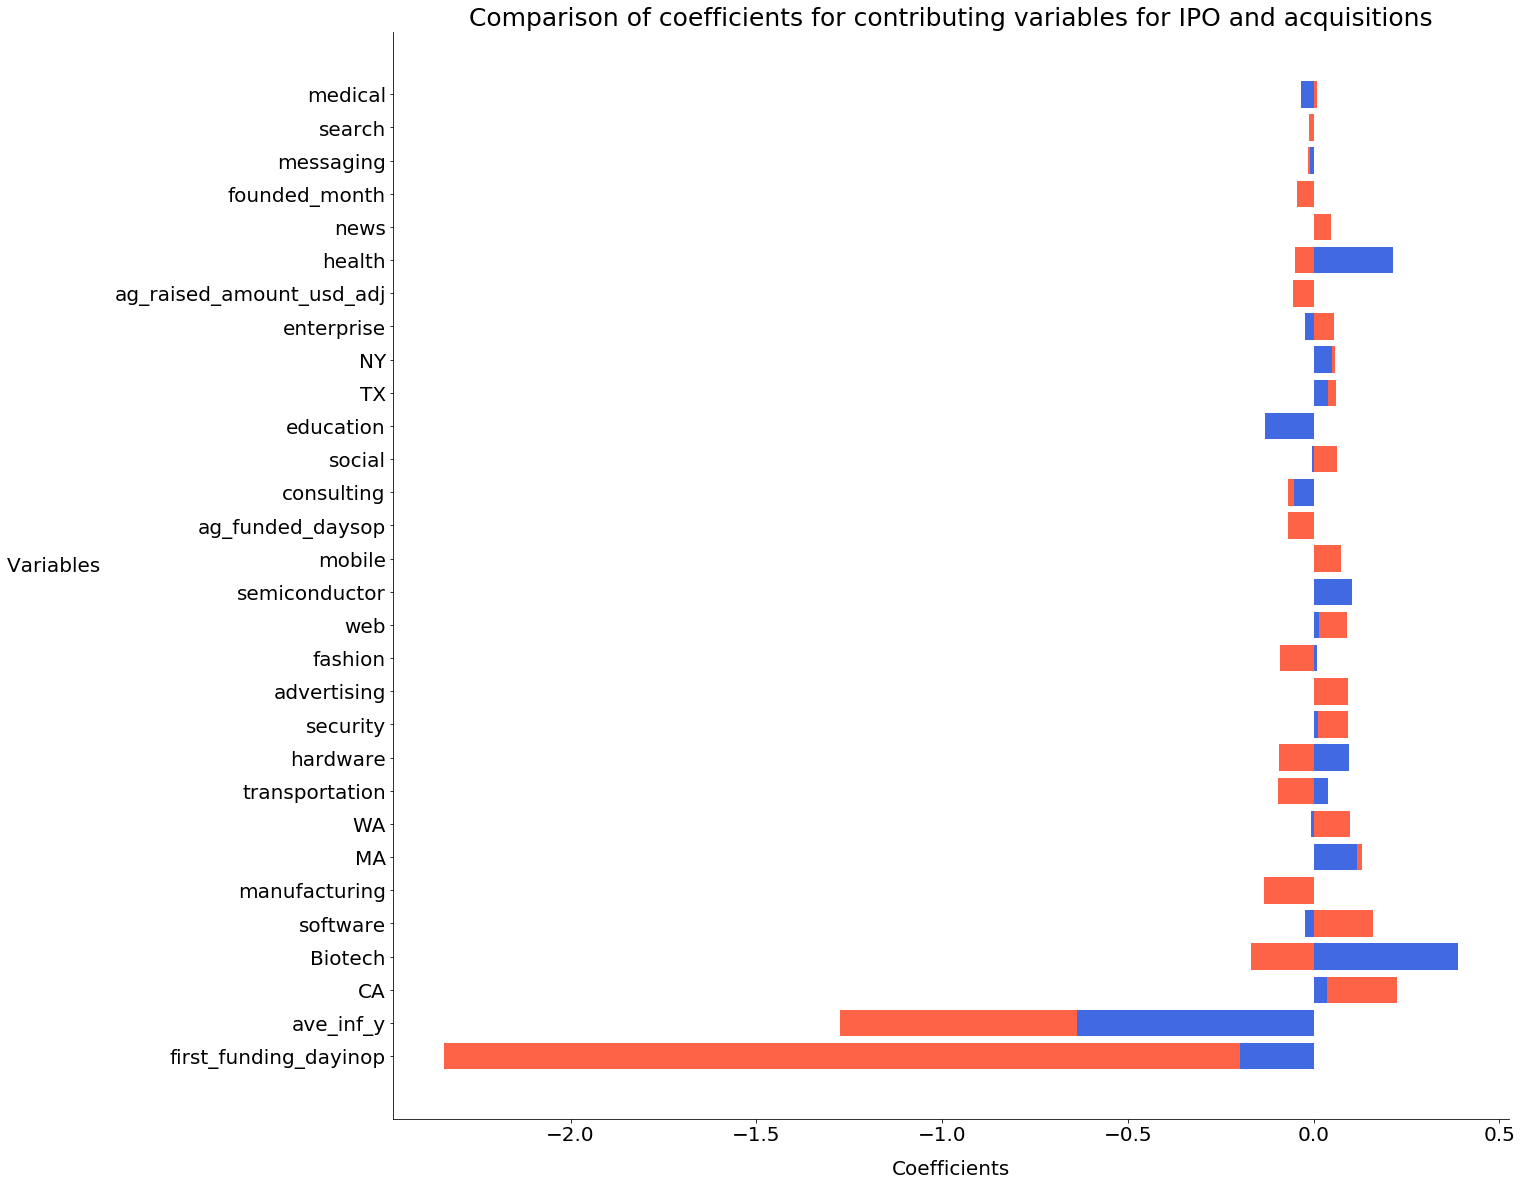

In [125]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef['coefs_ac'],color='tomato')
plt.barh(crange, coef['coefs_ipo'],color='royalblue')
plt.yticks(crange, coef['names'])

# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Comparison of coefficients for contributing variables for IPO and acquisitions", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()